In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [36]:
## load data
company = 'FB'

start = dt.datetime(2012,1,1)
end = dt.datetime(2021,1,1)

data = web.DataReader(company, 'yahoo', start, end)


In [37]:
# Preprocess data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))

In [38]:
## appending data to list 
prediction_days=60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))   
    
    
    

Building Recurrent Neural Network
using LTSM (With Keras) and adding dropout after each layer to increase white noise 
and not overfit the data
I am using Adam optimization with square loss function

In [39]:
## build and train the model
## LTSM rnn model with 3 hidden layers
## 
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# using adam optimization and loss fuction of mean squre error
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
66/66 [==============================] - 10s 74ms/step - loss: 0.0143
Epoch 2/25
66/66 [==============================] - 5s 75ms/step - loss: 0.0027
Epoch 3/25
66/66 [==============================] - 5s 74ms/step - loss: 0.0027
Epoch 4/25
66/66 [==============================] - 5s 74ms/step - loss: 0.0026
Epoch 5/25
66/66 [==============================] - 5s 75ms/step - loss: 0.0024
Epoch 6/25
66/66 [==============================] - 5s 74ms/step - loss: 0.0021
Epoch 7/25
66/66 [==============================] - 5s 75ms/step - loss: 0.0022
Epoch 8/25
66/66 [==============================] - 5s 75ms/step - loss: 0.0024
Epoch 9/25
66/66 [==============================] - 5s 75ms/step - loss: 0.0021
Epoch 10/25
66/66 [==============================] - 5s 72ms/step - loss: 0.0019
Epoch 11/25
66/66 [==============================] - 5s 70ms/step - loss: 0.0018
Epoch 12/25
66/66 [==============================] - 5s 70ms/step - loss: 0.0018
Epoch 13/25
66/66 [=================

In [30]:
## testing model accuracy 
# load test data

test_start = dt.datetime(2021,1,2)
test_end = dt.datetime(2021,5,6)

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Adj Close'].values

total_dataset = pd.concat((data['Adj Close'],test_data['Adj Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)



In [31]:
# make predictions on Test Data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1,1))



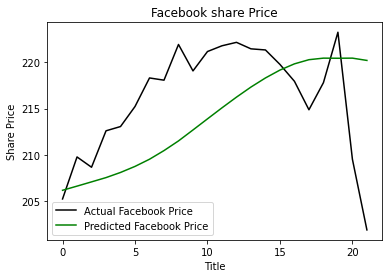

In [32]:
plt.plot(actual_prices, color="black" , label=f"Actual Facebook Price")
plt.plot(predicted_prices, color="green", label=f"Predicted Facebook Price")
plt.title(f"Facebook share Price")
plt.xlabel('Title')
plt.ylabel(f'Share Price')
plt.legend()
plt.show()

In [33]:
#predict next day
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs)+1,0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

In [35]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction for tomorrow :{prediction}")

Prediction for tomorrow :[[219.47633]]
